In [1]:
%cd ..

import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation

from dataset import VOT14Reader
from trackers import ColorTracker, NumpyColorTracker, SIFTTracker, ScaleSpaceTracker

from scratch.meanshift import meanshift
from scratch.camshift import camshift

/Users/santapo/Works/AIVN/AIVN-materials/object_tracking


In [2]:
from functools import partial

dataset = VOT14Reader(dataset_path="./vot14")

sample = dataset[13] # 13 for ball
polygon = sample[1][0]
frame = sample[0][0]

# tracker = partial(cv2.CamShift, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1))
tracker = meanshift
# tracker = partial(cv2.meanShift, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1))

# color_tracker = ColorTracker(image=frame, roi_window=polygon, tracker=tracker)
# color_tracker = ScaleSpaceTracker(image=frame, roi_window=polygon, tracker=tracker, scale_range=[-2, 3])
color_tracker = SIFTTracker(image=frame, roi_window=polygon, tracker=tracker)

/Users/santapo/Works/AIVN/AIVN-materials/object_tracking/trackers/sift_tracker.py:23: RuntimeWarning: divide by zero encountered in divide
  R = M / I
/Users/santapo/Works/AIVN/AIVN-materials/object_tracking/trackers/sift_tracker.py:23: RuntimeWarning: invalid value encountered in divide
  R = M / I


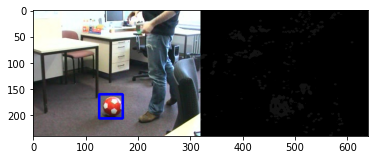

In [3]:
fig, ax = plt.subplots()
images = []
for frame in sample[0][1:]:
    color_tracker.track(frame)
    polygon = color_tracker.get_current_window()
    x, y, w, h = polygon
    image = cv2.rectangle(frame, (x, y), (x+w, y+h), 255, 3)

    # final_image = np.concatenate([image, color_tracker.probability_map])
    final_image = np.concatenate([cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
                                  cv2.cvtColor((255 * color_tracker.probability_map/color_tracker.probability_map.max()).astype(np.uint8), cv2.COLOR_GRAY2BGR)], axis=1)
    images.append([ax.imshow(final_image, animated=True)])

In [5]:
ani = animation.ArtistAnimation(fig, images, interval=50, blit=True, repeat_delay=1000)

In [ ]:
# final_image = np.concatenate([image, cv2.cvtColor(color_tracker.probability_map, cv2.COLOR_GRAY2BGR)], axis=1)


In [6]:
from IPython.display import HTML
HTML(ani.to_html5_video())


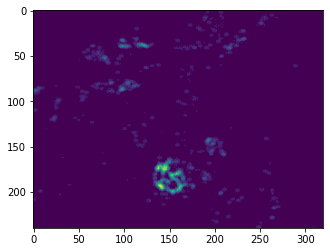

In [ ]:
plt.imshow(color_tracker.probability_map)